## 1. Setup and Load Data

### 1.1 Import the Dependencies








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### 1.2 Load Data

In [ ]:
df = pd.read_csv(r'/content/bank_transactions.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
df.shape

(1048567, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


### 1.3 Preprocess Data

In [ ]:
# Checking for null values
df.isnull().sum()*100/len(df)

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

Since null values are only a small percentage of data, removing them won't affect overall performance

In [ ]:
# Removing null values
df = df.dropna()

In [ ]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
# COnvert dates to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = '%d/%m/%y')

<ipython-input-8-07e706d93542>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = '%d/%m/%y')


## 2. Create a DataFrame for RFM analysis

In [ ]:
rfm = df.groupby('CustomerID').agg({'TransactionDate': lambda x: (df['TransactionDate'].max() - x.max()).days ,  # Recency
                                     'TransactionID': 'count',      # Frequency
                                     'TransactionAmount (INR)': 'sum'     # Monetary
                                     }).reset_index()

In [ ]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
# Standardize the features
scaler = StandardScaler()

In [ ]:
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [ ]:
rfm_scaled.shape

(879358, 3)

## 3. K-means Clustering

### 3.1 Apply K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Determine the optimal number of clusters using the elbow method

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=2)
  kmeans.fit(rfm_scaled)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

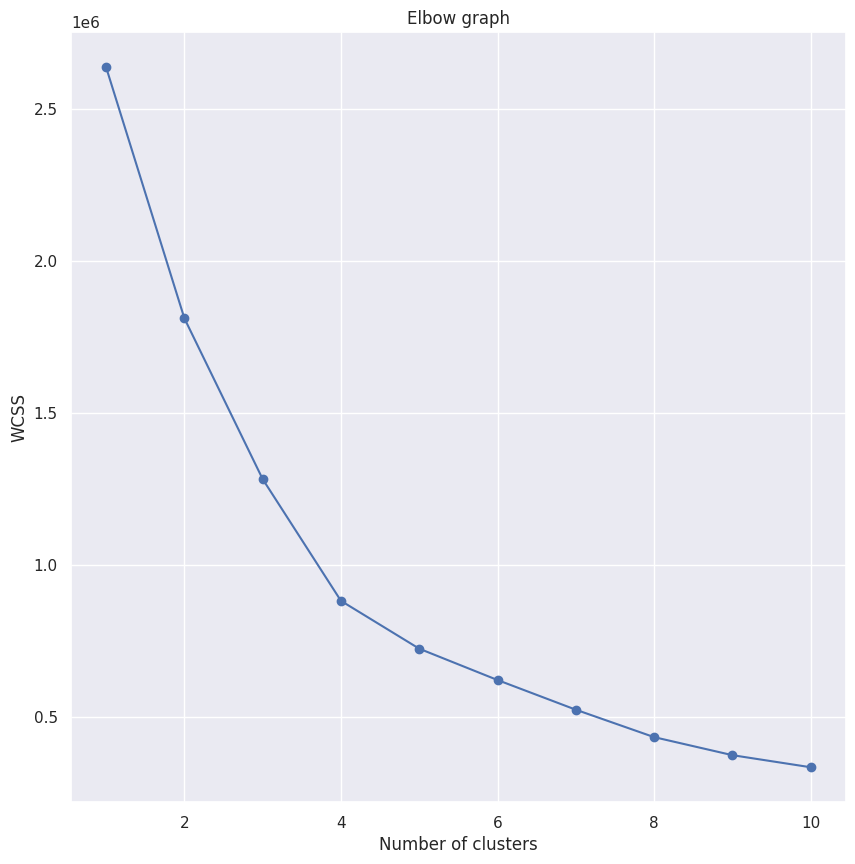

In [ ]:
# Plot the elbow graph

plt.figure(figsize=(10,10))
sns.set()
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow graph')
plt.show()

**Optimum number of clusters = 4**

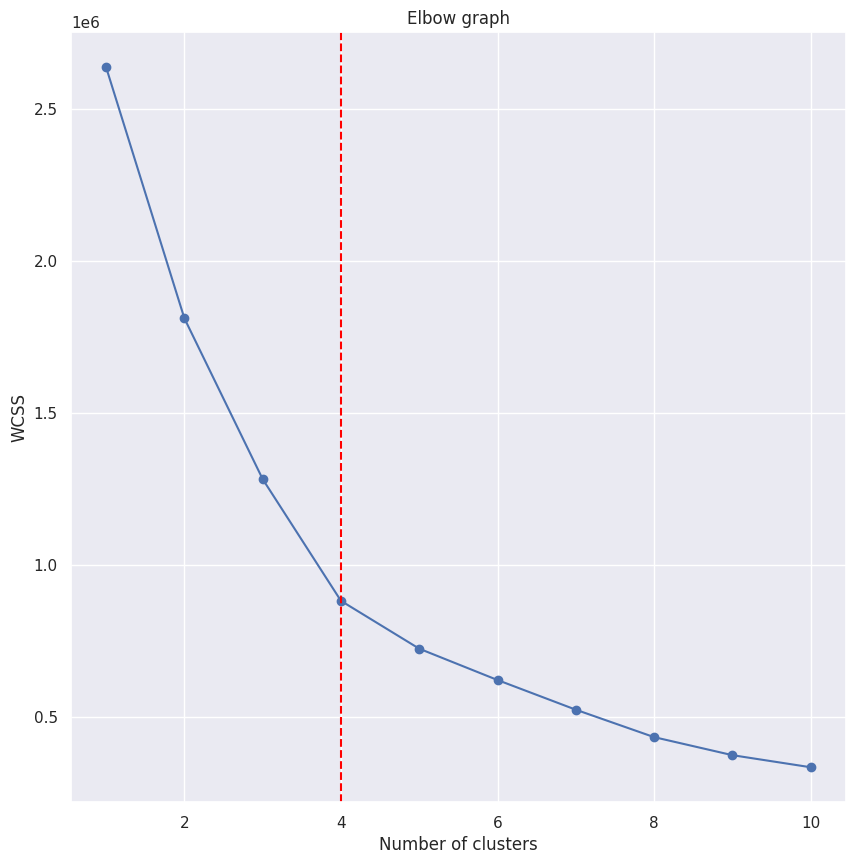

In [ ]:
optimal_clusters = 4

plt.figure(figsize=(10,10))
sns.set()
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow graph')

plt.axvline(x=optimal_clusters, color='red', linestyle='--')

plt.show()

In [ ]:
# Apply K-means

kmeans = KMeans(n_clusters=optimal_clusters, random_state=2)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(rfm['Cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0         3
1         1
2         3
3         0
4         1
         ..
879353    1
879354    0
879355    1
879356    0
879357    0
Name: Cluster, Length: 879358, dtype: int32


4 clusters = 0,1,2,3

In [ ]:
# Analyze each cluster

rfm_cluster_analysis = rfm.groupby('Cluster').agg({
  'Recency': 'mean',
  'Frequency': 'mean',
  'Monetary': 'mean'
}).reset_index()

In [ ]:
print(rfm_cluster_analysis)

   Cluster    Recency  Frequency      Monetary
0        0  43.515656   1.000000   1270.648114
1        1  69.345163   1.000000   1300.918767
2        2  53.321654   1.350391  75139.069652
3        3  47.599699   2.142482   2758.131297


### 3.2 Visualize the Clusters

<Axes: xlabel='Frequency', ylabel='Monetary'>

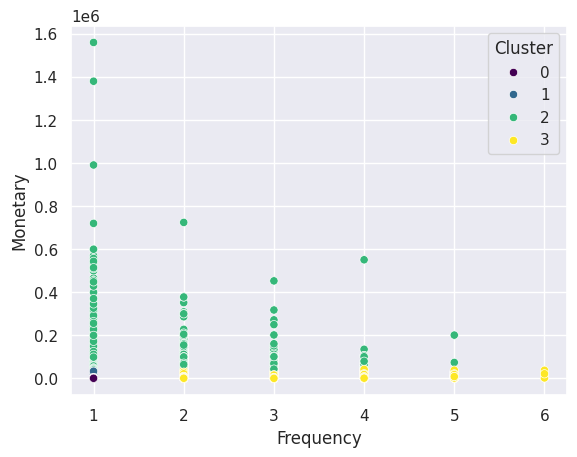

In [ ]:
# Graph showing customer segments based on Frequency and Monetary

plt.figure(figsize=(10,10))

sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer segments based on Frequency and Monetary')
plt.show()

<Axes: xlabel='Recency', ylabel='Monetary'>

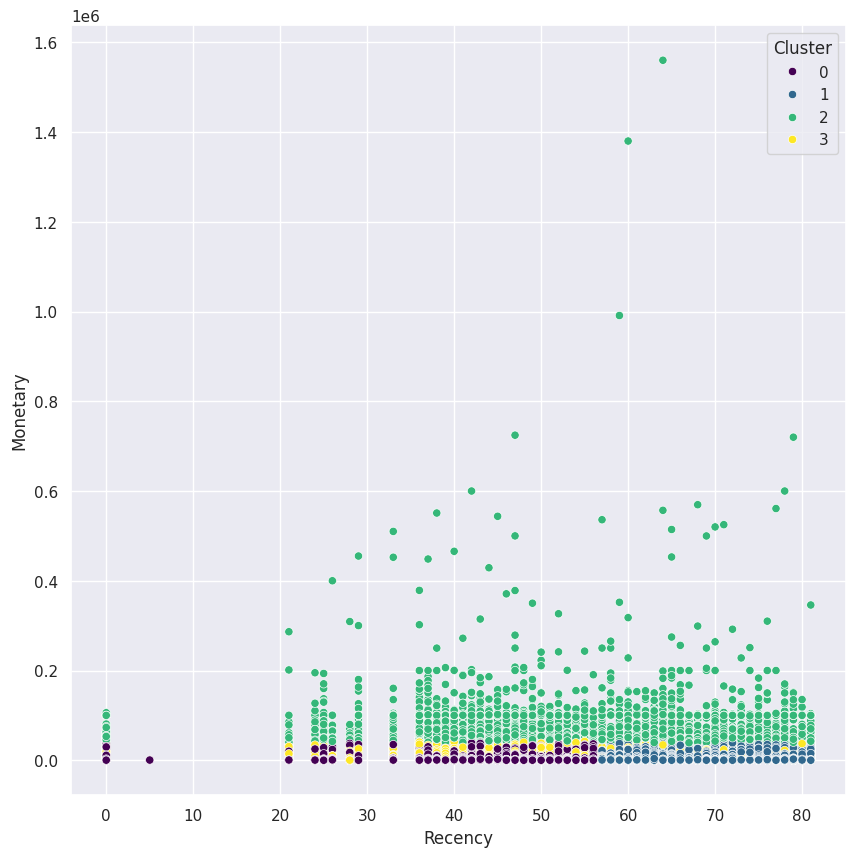

In [ ]:
# Graph showing customer segments based on Recency and Monetary

plt.figure(figsize=(10,10))

sns.scatterplot(data = rfm, x='Recency', y = 'Monetary', hue='Cluster', palette='viridis')
plt.title('Customer segments based on Recency and Monetary')
plt.show()

<Axes: xlabel='Frequency', ylabel='Recency'>

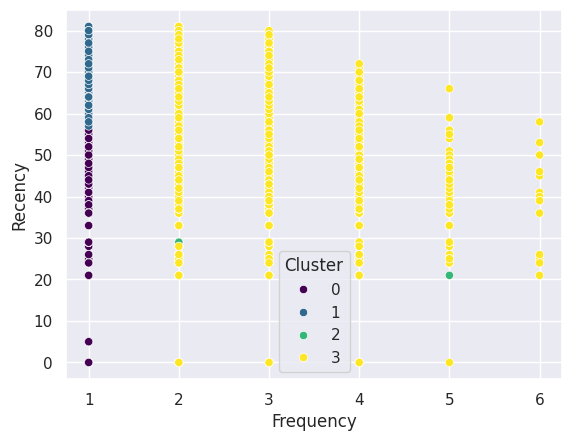

In [ ]:
# Graph showing customer segments based on Frequency and Recency

plt.figure(figsize=(10,10))

sns.scatterplot(x='Frequency', y='Recency', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer segments based on Frequency and Recency')
plt.show()

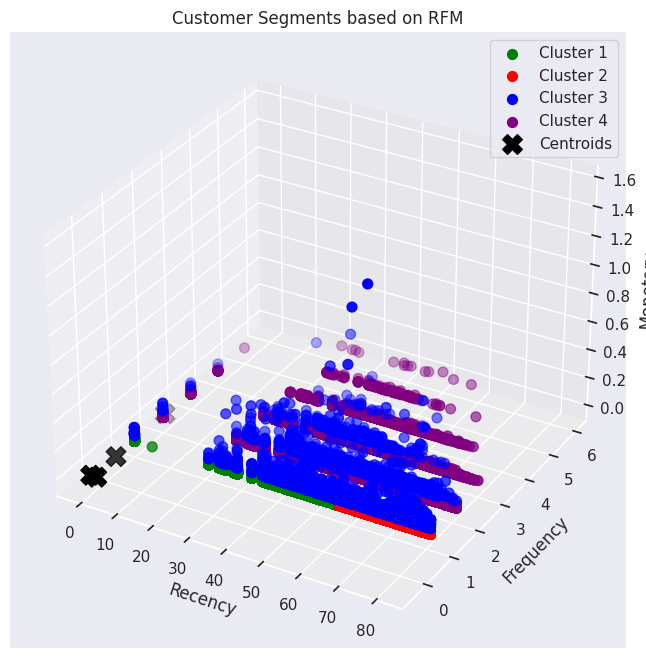

In [ ]:
# 3D graph showing customer segments based on RFM

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['green', 'red', 'blue', 'purple']
for cluster in range(4):
    ax.scatter(rfm.loc[rfm['Cluster'] == cluster, 'Recency'],
               rfm.loc[rfm['Cluster'] == cluster, 'Frequency'],
               rfm.loc[rfm['Cluster'] == cluster, 'Monetary'],
               c=colors[cluster], s=50, label=f'Cluster {cluster+1}')

ax.set_title('Customer Segments based on RFM')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()

plt.show()